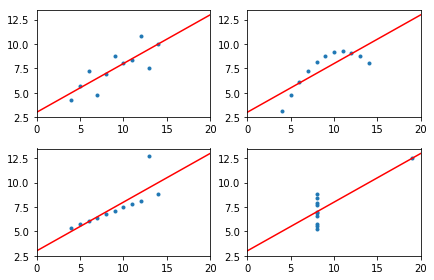

In [233]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def display_anscombe():
    data = np.load('../anscombe.npy')
    section1 = data[:, 0:2]
    section2 = data[:, 2:4]
    section3 = data[:, 4:6]
    section4 = data[:, 6:8]
    
    plt.subplot(221)
    plt.plot(section1[:, 0], section1[:, 1], '.')
    plt.plot(0.5 * np.arange(21) + 3, 'r-')
    plt.xlim(0, 20)
    
    plt.subplot(222)
    plt.plot(section2[:, 0], section2[:, 1], '.')
    plt.plot(0.5 * np.arange(21) + 3, 'r-')
    plt.xlim(0, 20)
    
    plt.subplot(223)
    plt.plot(section3[:, 0], section3[:, 1], '.')
    plt.plot(0.5 * np.arange(21) + 3, 'r-')
    plt.xlim(0, 20)
    
    plt.subplot(224)
    plt.plot(section4[:, 0], section4[:, 1], '.')
    plt.plot(0.5 * np.arange(21) + 3, 'r-')
    plt.xlim(0, 20)
    
    plt.tight_layout()
    
    plt.show()

display_anscombe()

The first plot looks like regular, randomly sampled data that demonstrates a correlation between x and y. The second plot clearly follows a curve, like an upside down parabola. The third plot is almost entirely linear except for one outlier, which skews the regression. The fourth plot is even more extreme, with only two distinct values of x sampled.

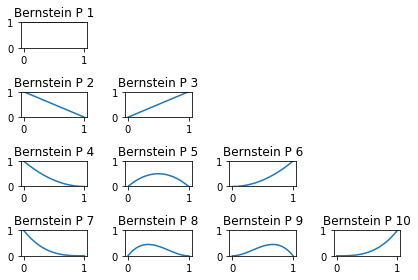

In [38]:
def display_bernstein():
    domain = np.linspace(0, 1, 100)
    polynomial_list = []
    for n in range(4):
        for v in range(n + 1):
            plt.subplot(4, 4, 4 * n + v + 1)
            plt.plot(domain, special.binom(n, v) * (domain ** v) * ((1 - domain) ** (n - v)))
            plt.ylim(0, 1)
            plt.title("Bernstein P {}".format(sum(range(n + 1)) + v + 1))
    plt.tight_layout()
    plt.show()

display_bernstein()

p-value weight vs. height: 1.655281772166374e-76
p-value height vs. age: 0.01759844345745778
p-value weight vs. age: 3.165059637416376e-07


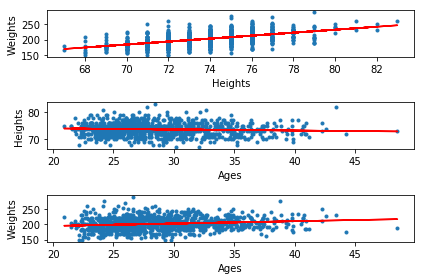

In [229]:
def display_MLB():
    data = np.load("../MLB.npy")
    heights = data[:, 0]
    weights = data[:, 1]
    ages = data[:, 2]
    
    plt.subplot(311)
    rwh = stats.linregress(heights, weights)
    print("p-value weight vs. height: {}".format(rwh[3]))
    plt.plot(heights, weights, '.')
    plt.xlabel("Heights")
    plt.ylabel("Weights")
    plt.plot(heights, rwh[0] * heights + rwh[1], 'r-')
    
    plt.subplot(312)
    rha = stats.linregress(ages, heights)
    print("p-value height vs. age: {}".format(rha[3]))
    plt.plot(ages, heights, '.')
    plt.xlabel("Ages")
    plt.ylabel("Heights")
    plt.plot(ages, rha[0] * ages + rha[1], 'r-')
    
    plt.subplot(313)
    rwa = stats.linregress(ages, weights)
    print("p-value weight vs. age: {}".format(rwa[3]))
    plt.plot(ages, weights, '.')
    plt.xlabel("Ages")
    plt.ylabel("Weights")
    plt.plot(ages, rwa[0] * ages + rwa[1], 'r-')
    
    plt.tight_layout()
    plt.show()

display_MLB()

So, there is a positive correlation between height and weight, and a (less significant) positive correlation between age and weight. This is what we would expect, intuitively.

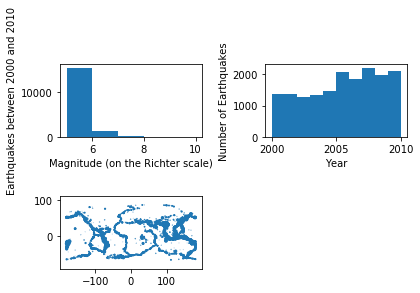

In [76]:
def display_quakes():
    data = np.load("../earthquakes.npy")
    dates = data[:, 0]
    magnitudes = data[:, 1]
    longitudes = data[:, 2]
    latitudes = data[:, 3]
    
    plt.subplot(221)
    plt.hist(magnitudes, bins=np.arange(5, 11))
    plt.ylabel("Earthquakes between 2000 and 2010")
    plt.xlabel("Magnitude (on the Richter scale)")
    
    plt.subplot(222)
    plt.hist(dates, bins=np.arange(2000, 2011))
    plt.ylabel("Number of Earthquakes")
    plt.xlabel("Year")
    
    plt.subplot(223)
    plt.scatter(longitudes, latitudes, s=(magnitudes - 4.9) ** 2)
    plt.axis("equal")

    plt.tight_layout()
    plt.show()
    
display_quakes()

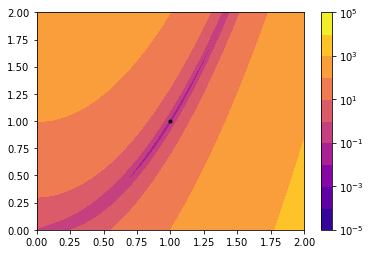

In [128]:
def display_rosenbrock():
    domain = np.linspace(0, 2, 1000)
    X, Y = np.meshgrid(domain, domain)
    Z = ((1 - X) ** 2) + 100 * ((Y - (X ** 2)) ** 2)
    plt.contourf(X, Y, Z, cmap="plasma", norm=LogNorm())
    plt.plot(1, 1, 'k.')
    plt.colorbar()
    plt.show()
    
display_rosenbrock()

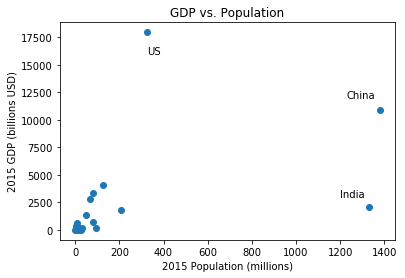

In [282]:
def display_GDP_Population():
    data = np.load('../countries.npy')
    populations = data[:, 0]
    GDPs = data[:, 1]
    
    plt.scatter(populations, GDPs)
    plt.xlabel("2015 Population (millions)")
    plt.ylabel("2015 GDP (billions USD)")
    plt.annotate('US', xy=(3.24311000e+02, 1.79469960e+04), xytext = (3.24311000e+02, 1.6e+04))
    plt.annotate('China', xy=(1.37836000e+03, 1.08664440e+04), xytext = (1.23e+03, 1.2e+04))
    plt.annotate('India', xy=(1.33009000e+03, 2.07354300e+03), xytext = (1.2e+03, 3.0e+03))
    plt.title("GDP vs. Population")
    
    plt.show()
    
display_GDP_Population()

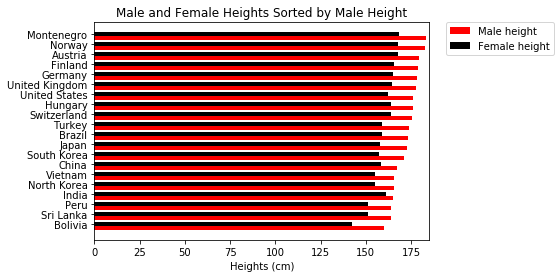

In [262]:
def display_MF_Heights():
    data = np.load('../countries.npy')
    mheights = data[:, 2]
    fheights = data[:, 3]
    countries = ["Austria", "Bolivia", "Brazil", "China", "Finland", "Germany", "Hungary", "India", 
                 "Japan", "North Korea", "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka", 
                 "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"]
    positions = np.arange(len(countries))
    sorted_heights = sorted(zip(countries, zip(mheights, fheights)), key = lambda x: x[1][0]) #Sorting by male height
    
    bar_width = 0.4
    plt.barh(positions, [x[1][0] for x in sorted_heights], bar_width, color='r', label='Male height')
    plt.barh(positions + bar_width, [x[1][1] for x in sorted_heights], bar_width, color='k', label='Female height')
    plt.xlim(0, 185)
    plt.xlabel('Heights (cm)')
    plt.title('Male and Female Heights Sorted by Male Height')
    plt.yticks(positions + bar_width, [x[0] for x in sorted_heights])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

display_MF_Heights()

p-value average height vs. GDPpc: 0.00251186765200005


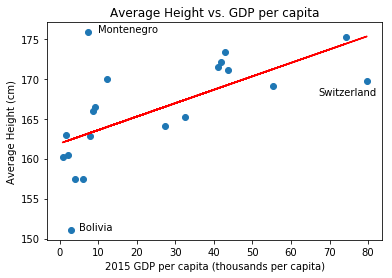

In [284]:
def display_GDPpc_Height():
    data = np.load('../countries.npy')
    populations = data[:, 0]
    GDPs = data[:, 1]
    mheights = data[:, 2]
    fheights = data[:, 3]
    
    r = stats.linregress(GDPs / populations, (mheights + fheights)/2)
    plt.scatter(GDPs / populations, (mheights + fheights)/2)
    print("p-value average height vs. GDPpc: {}".format(r[3]))
    plt.plot(GDPs / populations, r[0] * (GDPs / populations) + r[1], 'r-')
    plt.xlabel("2015 GDP per capita (thousands per capita)")
    plt.ylabel("Average Height (cm)")
    plt.annotate('Montenegro', xy=(10, 175.8), xytext = (10, 175.8))
    plt.annotate('Bolivia', xy=(5, 151.1), xytext = (5, 151.1))
    plt.annotate('Switzerland', xy=(67, 168), xytext = (67, 168))
    plt.title("Average Height vs. GDP per capita")
    
    plt.show()

display_GDPpc_Height()

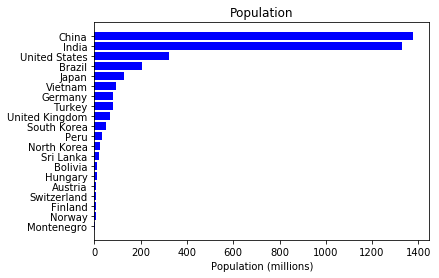

In [281]:
def display_Population():
    data = np.load('../countries.npy')
    populations = data[:, 0]
    countries = ["Austria", "Bolivia", "Brazil", "China", "Finland", "Germany", "Hungary", "India", 
                 "Japan", "North Korea", "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka", 
                 "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"]
    positions = np.arange(len(countries))
    sorted_population = sorted(zip(countries, populations), key=lambda x: x[1])
    
    plt.barh(positions, [x[1] for x in sorted_population], color='b')
    plt.xlabel('Population (millions)')
    plt.title('Population')
    plt.yticks(positions, [x[0] for x in sorted_population])
    plt.show()

display_Population()